In [24]:
import pandas as pd
import numpy as np
import datetime as dt

In [25]:
sales_train = pd.read_csv('sales_train.csv')
sample_submission = pd.read_csv('sample_submission.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')

In [26]:
print (sales_train.shape)
print (sales_train.head())
print (shops.shape)
print (shops.head())
print (item_categories.shape)
print (item_categories.head())
print(items.shape)
print (items.head())

(2935849, 6)
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
(60, 2)
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
(84, 2)
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

In [27]:
print(sample_submission.head() )
print(sample_submission.shape)
print(sample_submission.item_cnt_month.std())
#print(test.head() )

ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5
(214200, 2)
0.0


In [34]:
sample_train = sales_train.sample(frac = 0.01)
sample_train['day'] = sales_train['date'].str[0:2].astype('int32')
sample_train['month'] = sales_train['date'].str[3:5].astype('int32')
sample_train['year'] = sales_train['date'].str[6:10].astype('int32')
sample_train['date'] = pd.to_datetime(sales_train.date, format = '%d.%m.%Y')
sample_train['wday'] = sample_train.date.dt.dayofweek

In [35]:
# sales_train['day'] = sales_train['date'].str[0:2].astype('int32')
# sales_train['month'] = sales_train['date'].str[3:5].astype('int32')
# sales_train['year'] = sales_train['date'].str[6:10].astype('int32')
# sales_train['date'] = pd.to_datetime(sales_train.date, format = '%d.%m.%Y')
# sales_train['wday'] = sales_train.date.dt.dayofweek
# sales_train.day.value_counts()

In [36]:
sample_train.month.value_counts()

1     3004
2     2738
3     2735
12    2712
8     2568
7     2371
6     2362
4     2347
5     2271
9     2221
10    2189
11    1840
Name: month, dtype: int64

In [37]:
sample_train.year.value_counts()

2013    12429
2014    10678
2015     6251
Name: year, dtype: int64

In [38]:
# MONDAY = 0, Saturday = 5, Sunday = 6
sample_train.wday.value_counts()

5    5816
6    4989
4    4421
3    3780
2    3543
1    3405
0    3404
Name: wday, dtype: int64

In [83]:
#sample_train['ymw'] = sample_train['year'].astype(str).str[0:4] + sample_train['month'].astype(str).str.rjust(2,'0') + sample_train['wday'].astype(str).str.rjust(2,'0')
sample_train['ymw'] = sample_train['year'] * 60 - 2013 * 60 + sample_train['month'] * 5 - 5 + sample_train['wday']
#sample_train['ymw'] = sample_train['ymw'].astype('int64')

In [84]:
sample_train.ymw.value_counts()

55     456
60     390
61     386
116    386
10     366
      ... 
143     63
168     63
149     60
167     52
142     47
Name: ymw, Length: 172, dtype: int64

In [85]:
import matplotlib.pyplot as plt

(array([24., 51., 32., 12., 21., 13.,  8.,  7.,  3.,  1.]),
 array([ 47. ,  87.9, 128.8, 169.7, 210.6, 251.5, 292.4, 333.3, 374.2,
        415.1, 456. ]),
 <a list of 10 Patch objects>)

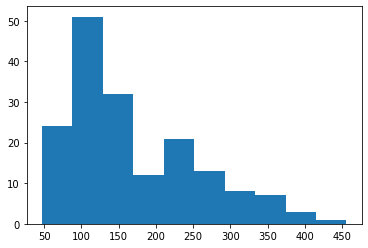

In [86]:
plt.hist(sample_train.ymw.value_counts() )

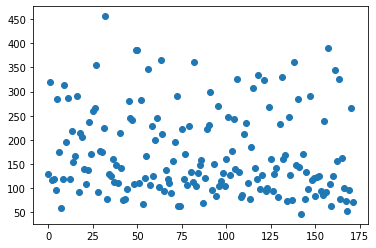

In [87]:
fig = plt.scatter(sample_train.ymw.unique(), sample_train.ymw.value_counts() )

In [72]:
# 238 unique weeks in dataset
sample_train.ymw.unique().shape

(238,)